In [ ]:
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Example 1

# upload dataset

In [ ]:
# read and make a dataframe of data
wq=pd.read_csv('/content/water_potability.csv')

# preprocessing

In [ ]:
# show the first 5(default) rows
wq.head()

,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity,Potability
0,0.000000,214.846144,49456.58711,7.897539,583.448849,7.702328,4.928840,0
1,0.227499,152.530111,39028.59934,3.462492,443.029232,13.201943,3.545741,1
2,0.975578,221.204114,31145.11074,7.615583,439.112765,21.145954,2.533996,0
3,0.989912,133.216942,16922.85390,9.293289,322.291191,10.430076,5.160604,1
4,1.431782,228.130383,12937.24689,6.214773,495.379883,12.033344,4.948443,0


In [ ]:
# show the dimensions of the dataframe
wq.shape

(2785, 8)

In [ ]:
# show the columns' names
wq.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Conductivity',
       'Organic_carbon', 'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
# determine X and y
y=wq['Potability']
x = wq[['ph', 'Hardness', 'Solids', 'Chloramines', 'Conductivity',
       'Organic_carbon', 'Turbidity']]
print(x)
# print(y)

             ph    Hardness       Solids  Chloramines  Conductivity  \
0      0.000000  214.846144  49456.58711     7.897539    583.448849   
1      0.227499  152.530111  39028.59934     3.462492    443.029232   
2      0.975578  221.204114  31145.11074     7.615583    439.112765   
3      0.989912  133.216942  16922.85390     9.293289    322.291191   
4      1.431782  228.130383  12937.24689     6.214773    495.379883   
...         ...         ...          ...          ...           ...   
2780  12.246928  217.368014  11318.14056     8.465160    347.653054   
2781  13.175402   47.432000  19237.94968     8.907020    500.245952   
2782  13.349889  152.776455  18464.90077     6.717973    450.846369   
2783  13.541240  187.606792  13475.91277     6.756055    411.264465   
2784  14.000000  235.677458  24008.99204     5.635029    460.745267   

      Organic_carbon  Turbidity  
0           7.702328   4.928840  
1          13.201943   3.545741  
2          21.145954   2.533996  
3          

In [ ]:
x.shape
# y.shape

(2785, 7)

In [ ]:
# splitting the dataset to the training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=70)

In [ ]:
# print the shape of splitted dataset
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1949, 7)
(836, 7)
(1949,)
(836,)


# Building a model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# build the model using sequential  and Dense layers and seperate the using ','
# Dense: fully connected layers
# units: number of neurons in each layer

model = Sequential([
    Dense(units=10,activation='sigmoid'),
    Dense(10,activation='sigmoid'),
    Dense(1,activation='sigmoid'),
    ])

In [ ]:
# determin the loss function and the optimizer
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
     optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),metrics=['accuracy'])

In [ ]:
# fit the model using X and y
# epoch: nuber of one complete forward and back propagation
# batch size: data is fed to the model in groups
history=model.fit(x_train, y_train, epochs=100, batch_size=16)

Epoch 1/100
122/122 [==============================] - 1s 2ms/step - loss: 0.6715 - accuracy: 0.6039
Epoch 2/100
122/122 [==============================] - 0s 2ms/step - loss: 0.6714 - accuracy: 0.6039
Epoch 3/100
122/122 [==============================] - 0s 2ms/step - loss: 0.6713 - accuracy: 0.6039
Epoch 4/100
122/122 [==============================] - 0s 2ms/step - loss: 0.6715 - accuracy: 0.6039
Epoch 5/100
122/122 [==============================] - 0s 2ms/step - loss: 0.6715 - accuracy: 0.6039
Epoch 6/100
122/122 [==============================] - 0s 2ms/step - loss: 0.6714 - accuracy: 0.6039
Epoch 7/100
122/122 [==============================] - 0s 2ms/step - loss: 0.6714 - accuracy: 0.6039
Epoch 8/100
122/122 [==============================] - 0s 2ms/step - loss: 0.6715 - accuracy: 0.6039
Epoch 9/100
122/122 [==============================] - 0s 2ms/step - loss: 0.6714 - accuracy: 0.6039
Epoch 10/100
122/122 [==============================] - 0s 2ms/step - loss: 0.6715 - accura

dict_keys(['loss', 'accuracy'])


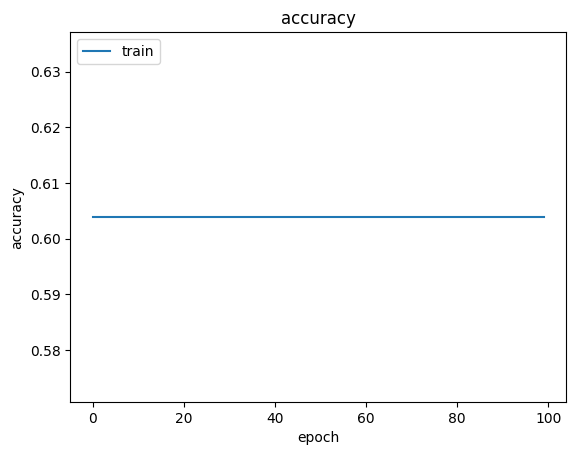

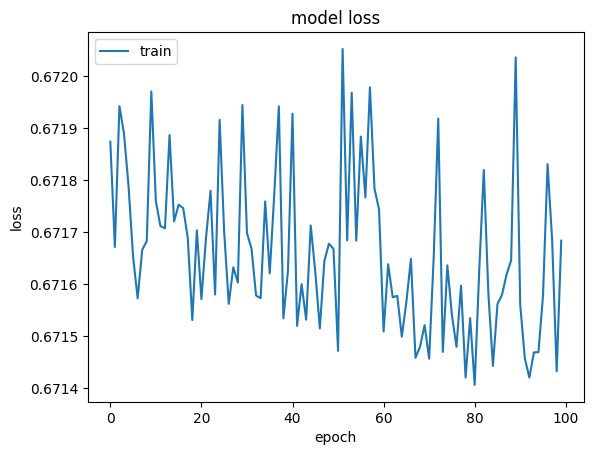

In [ ]:
# plot some diagrams for a better intution
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# number of parameters and layers
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                40        
                                                                 
 dense_11 (Dense)            (None, 10)                110       
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# predicting the results for testset
y_pred=model.predict(x_test)
y_pred

1/1 [==============================] - 0s 76ms/step


array([[0.47213587],
       [0.6232364 ],
       [0.6232364 ],
       [0.6232364 ],
       [0.6232364 ],
       [0.6232364 ],
       [0.47213587],
       [0.47213587],
       [0.6232364 ],
       [0.47217175],
       [0.6232364 ],
       [0.47213587],
       [0.6232364 ],
       [0.47213587],
       [0.47213587],
       [0.47213587],
       [0.47213587]], dtype=float32)

In [ ]:
# change the results to 0/1 due to a threshold (=0.5)
y_pred[y_pred>=0.5]=1
y_pred[y_pred<0.5]=0
y_pred

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [ ]:
# calculate f1 score which is a combination of precision and recall
from sklearn.metrics import f1_score
f1=f1_score(y_test, y_pred)
f1

0.5613126079447323

# Example 2

In [ ]:
# read and make a dataframe of data
co=pd.read_csv('/content/Car Ownership.csv')

In [ ]:
# show the first 5(default) rows
co.head()

,Monthly Income,Credit Score,Finance Status,Car
0,4500,660,0,0
1,4500,660,0,0
2,20000,600,0,0
3,20000,600,0,0
4,2500,550,0,0


In [ ]:
# show the dimensions of the dataframe
co.shape

(84, 4)

In [ ]:
# show the columns' names
co.columns

Index(['Monthly Income', 'Credit Score', 'Finance Status', 'Car'], dtype='object')

In [ ]:
# determine X and y
y=co['Car']
x = co[['Monthly Income', 'Credit Score', 'Finance Status']]
print(x)
# print(y)

    Monthly Income  Credit Score  Finance Status
0             4500           660               0
1             4500           660               0
2            20000           600               0
3            20000           600               0
4             2500           550               0
..             ...           ...             ...
79            8500           790               3
80            7000           780               3
81            7000           780               3
82            4000           750               3
83            4000           750               3

[84 rows x 3 columns]


In [ ]:
x.shape
# y.shape

(84, 3)

In [ ]:
# splitting the dataset to the training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=70)

In [ ]:
# print the shape of splitted dataset
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(67, 3)
(17, 3)
(67,)
(17,)


In [ ]:
# build the model using sequential  and Dense layers and seperate the using ','
# Dense: fully connected layers
# units: number of neurons in each layer

model = Sequential([
    Dense(units=10,activation='relu'),
    Dense(10,activation='relu'),
    Dense(1,activation='sigmoid'),
    ])

In [ ]:
# determin the loss function and the optimizer
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
     optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),metrics=['accuracy'])

In [ ]:
# fit the model using X and y
# epoch: nuber of one complete forward and back propagation
# batch size: data is fed to the model in groups
history=model.fit(x_train, y_train, epochs=100, batch_size=16)

Epoch 1/100
5/5 [==============================] - 1s 8ms/step - loss: 177835.0156 - accuracy: 0.5373
Epoch 2/100
5/5 [==============================] - 0s 11ms/step - loss: 0.6928 - accuracy: 0.5672
Epoch 3/100
5/5 [==============================] - 0s 7ms/step - loss: 0.6926 - accuracy: 0.5672
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 0.6925 - accuracy: 0.5672
Epoch 5/100
5/5 [==============================] - 0s 8ms/step - loss: 0.6924 - accuracy: 0.5672
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 0.6923 - accuracy: 0.5672
Epoch 7/100
5/5 [==============================] - 0s 9ms/step - loss: 0.6919 - accuracy: 0.5672
Epoch 8/100
5/5 [==============================] - 0s 8ms/step - loss: 0.6917 - accuracy: 0.5672
Epoch 9/100
5/5 [==============================] - 0s 10ms/step - loss: 0.6916 - accuracy: 0.5672
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 0.6913 - accuracy: 0.5672
Epoch 11/100
5/5 [====

dict_keys(['loss', 'accuracy'])


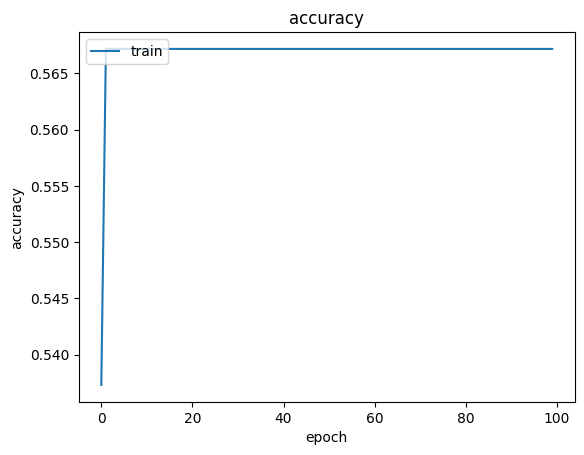

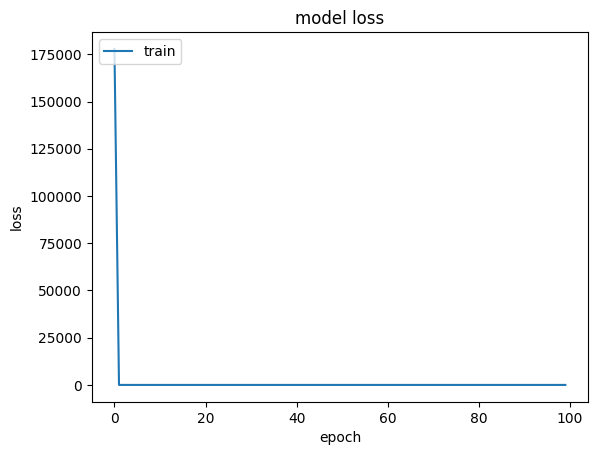

In [ ]:
# plot some diagrams for a better intution
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# number of parameters and layers
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                40        
                                                                 
 dense_17 (Dense)            (None, 10)                110       
                                                                 
 dense_18 (Dense)            (None, 1)                 11        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# predicting the results for testset
y_pred=model.predict(x_test)
y_pred

1/1 [==============================] - 0s 255ms/step


array([[0.5480993],
       [0.5480993],
       [0.5480993],
       [0.5480993],
       [0.5480993],
       [0.5480993],
       [0.5480993],
       [0.5480993],
       [0.5480993],
       [0.5480993],
       [0.5480993],
       [0.5480993],
       [0.5480993],
       [0.5480993],
       [0.5480993],
       [0.5480993],
       [0.5480993]], dtype=float32)

In [ ]:
# change the results to 0/1 due to a threshold (=0.5)
y_pred[y_pred>=0.5]=1
y_pred[y_pred<0.5]=0
y_pred

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
# calculate f1 score which is a combination of precision and recall
from sklearn.metrics import f1_score
f1=f1_score(y_test, y_pred)
f1

0.5217391304347826

# Example 3

In [ ]:
# read and make a dataframe of data
car=pd.read_csv('/content/car_data.csv')

In [ ]:
# show the first 5(default) rows
car.head()

,Gender,Age,AnnualSalary,Purchased
0,1,35,20000,0
1,1,40,43500,0
2,1,49,74000,0
3,1,40,107500,1
4,1,25,79000,0


In [ ]:
# show the dimensions of the dataframe
car.shape

(1000, 4)

In [ ]:
# show the columns' names
car.columns

Index(['Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')

In [ ]:
# determine X and y
y=car['Purchased']
x = car[['Gender', 'Age', 'AnnualSalary']]
print(x)
# print(y)

     Gender  Age  AnnualSalary
0         1   35         20000
1         1   40         43500
2         1   49         74000
3         1   40        107500
4         1   25         79000
..      ...  ...           ...
995       1   38         59000
996       0   47         23500
997       0   28        138500
998       0   48        134000
999       0   44         73500

[1000 rows x 3 columns]


In [ ]:
# splitting the dataset to the training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=70)

In [ ]:
# print the shape of splitted dataset
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 3)
(200, 3)
(800,)
(200,)


In [ ]:
# build the model using sequential  and Dense layers and seperate the using ','
# Dense: fully connected layers
# units: number of neurons in each layer

model = Sequential([
    Dense(units=5,activation='sigmoid'),
    Dense(5,activation='sigmoid'),
    Dense(1,activation='sigmoid'),
    ])

In [ ]:
# determin the loss function and the optimizer
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
     optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),metrics=['accuracy'])

In [ ]:
# fit the model using X and y
# epoch: nuber of one complete forward and back propagation
# batch size: data is fed to the model in groups
history=model.fit(x_train, y_train, epochs=100, batch_size=4)

Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 0.7933 - accuracy: 0.5863
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.7698 - accuracy: 0.5863
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.7507 - accuracy: 0.5863
Epoch 4/100
200/200 [==============================] - 1s 2ms/step - loss: 0.7354 - accuracy: 0.5863
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.7232 - accuracy: 0.5863
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.7135 - accuracy: 0.5863
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.7059 - accuracy: 0.5863
Epoch 8/100
200/200 [==============================] - 0s 2ms/step - loss: 0.6999 - accuracy: 0.5863
Epoch 9/100
200/200 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.5863
Epoch 10/100
200/200 [==============================] - 0s 2ms/step - loss: 0.6914 - accura

KeyboardInterrupt: ignored

dict_keys(['loss', 'accuracy'])


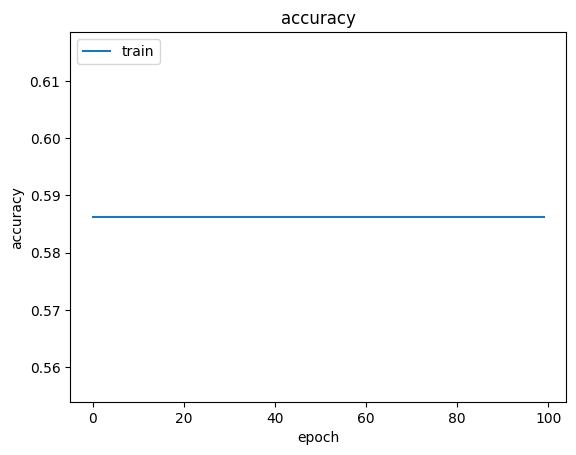

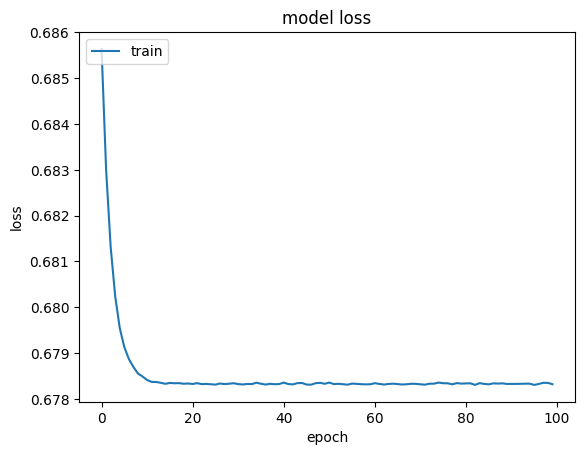

In [ ]:
# plot some diagrams for a better intution
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (16, 10)                  40        
                                                                 
 dense_20 (Dense)            (16, 10)                  110       
                                                                 
 dense_21 (Dense)            (16, 1)                   11        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# predicting the results for testset
y_pred=model.predict(x_test)
y_pred

7/7 [==============================] - 0s 7ms/step


array([[0.41423342],
       [0.41423342],
       [0.41423342],
       [0.41423342],
       [0.41423342],
       [0.41423342],
       [0.41423342],
       [0.41423342],
       [0.41423342],
       [0.41423342],
       [0.41423342],
       [0.41423342],
       [0.41423342],
       [0.41423342],
       [0.41423342],
       [0.41423342],
       [0.41423342],
       [0.41423342],
       [0.41423342],
       [0.41423342],
       [0.41423342],
       [0.41423342],
       [0.41423342],
       [0.41423342],
       [0.41423342],
       [0.41423342],
       [0.41423342],
       [0.41423342],
       [0.41423342],
       [0.41423342],
       [0.41423342],
       [0.41423342],
       [0.41423342],
       [0.41423342],
       [0.41423342],
       [0.41423342],
       [0.41423342],
       [0.41423342],
       [0.41423342],
       [0.41423342],
       [0.41423342],
       [0.41423342],
       [0.41423342],
       [0.41423342],
       [0.41423342],
       [0.41423342],
       [0.41423342],
       [0.414

In [ ]:
# change the results to 0/1 due to a threshold (=0.5)
y_pred[y_pred>=0.5]=1
y_pred[y_pred<0.5]=0
y_pred

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [ ]:
# calculate f1 score which is a combination of precision and recall
from sklearn.metrics import f1_score
f1=f1_score(y_test, y_pred)
f1

0.0